In [ ]:
AMAZONE REVIEWS SCRAPPING

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re # regular expressions 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# creating empty reviews list 
JBL_reviews =[]


for i in range(1,200):
    ip=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
    url="https://www.amazon.in/JBL-C50HI-Ear-Headphones-Blue/product-reviews/B07JQKR35P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType="+str(i)
   # url = "https://www.amazon.in/gp/customer-reviews/R2THPGD49TIZHJ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&pageNumber="+str(i)
    #url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
    #headers = {'User-Agent': 'Bob\'s_request'}
    response = requests.get(url)  #,headers=headers)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
  
    for i in range(len(reviews)):
        
        ip.append(reviews[i].text)  
    JBL_reviews=JBL_reviews+ip    


In [30]:
ip_rev_string = " ".join(JBL_reviews)

In [3]:
JBL_reviews

['\n\n  I loved to listen music with earphones. I have already used JBL c100si & c200si. I bought this one to gift someone. I used this JBL C50HI for 3-4 days & here are some points that will be helpful to decide to buy this or not.Build- Earbuds housing made with plastic looks basic. Wire length is 1.2mtr. It is very thin & twin wire. Wire is not tangle free. It is not feel strong & durable. One good thing is L shape 3.5mm jack so you can put in pocket while sitting without no worries. Overall build quality is average.Sound- Sound Quality is well balanced. Bass is good,Vocals & acoustics are clear even on 100% volume. And as I said sound output is well balanced so it is loud & clear but not so much loud so you can listen music on full volume. You will feel the true JBL Sound with this earphones. I used it with OnePlus 3T.Earphones comes with in-line remote with single multifunctional button & Mic. Mic works good during calls.Overall sound output is good you can feel the True JBL Sound

In [4]:
import pandas as pd
review_df=pd.DataFrame()
review_df["Text"]=JBL_reviews

In [5]:
review_df

,Text
0,\n\n I loved to listen music with earphones. ...
1,\n\n Lots of request floating in @ What the ...
2,\n\n The bass response of the earphones is am...
3,\n\n Product was good..JBL mark ..But worst d...
4,\n\n Bought this one reading all the good rev...
...,...
1615,\n\n I recently bought these earphones becaus...
1616,"\n\n Great music.. excellent treble, good bas..."
1617,\n\n There are three things that impressed me...
1618,\n\n I bought these earphones a couple of wee...


In [6]:
len(review_df)

1620

In [7]:
def clean_data(text):#convert text into lower case letters,remove special characters,symbols
    #wordnet=WordNetLemmatizer()
    data=text.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    data = re.sub(r"(http|https|pic.)\S+"," ",data)
    data = re.sub("-" ," ",data) 
    data = re.sub('\'', "", data)
    data = re.sub("\n" ," ",data)
    return data

In [8]:
review_df["Text"]=review_df["Text"].apply(clean_data)

In [9]:
#check the first tweets
review_df["Text"][1]

'     lots of request floating in   what the watt   reviews for reviewing this entry level headphones from jbl   we got this headphones from a colleague and thought its time to post a detailed review after a week of constant usage we tried plenty of entry level cheap headphones  time and again realizing one thing    the bitterness of poor quality remains long after the sweetness of low prices are forgotten summary of review   specifications   mic and   button remote   reasons to buy  a  great fit and multiple right sleeves for that perfect bass response  b  amazing bass   reasons not to buy  a  many options available if one can up the budget by     rupees by jbl and other brandsdetailed reviewpackaging   the one startling thing you notice when receiving this product from amazon is what lies beneath that packaging of amazon is a great package of jbl and jbl has not compromised on their values to provide great packaging and great sound  when you compare the same with mi or boat its prett

In [10]:
#check any null values present in the text
review_df.isnull().sum()

Text    0
dtype: int64

In [11]:
#peform lammatization to remove stopwords in data set
lemmatizer=WordNetLemmatizer()
def remove_stopwords(text):
    words=nltk.word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
    words=' '.join(words)
    return words

In [12]:
review_df["Text"]=review_df["Text"].apply(remove_stopwords)

In [38]:
#check the second tweets
review_df["Text"][3]

'product good jbl mark worst delivery amazon'

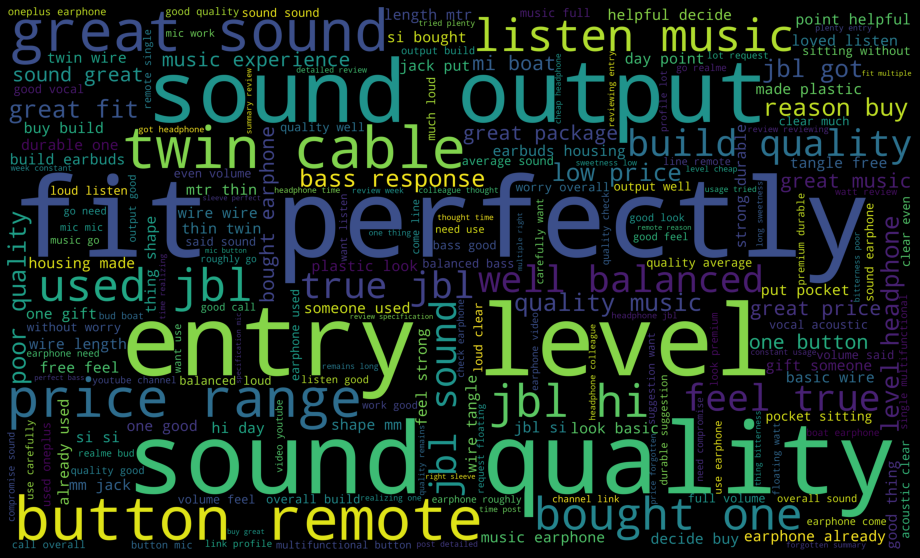

In [14]:
#plot wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(review_df.Text))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

reference link:www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob

In [15]:
from textblob import TextBlob

In [16]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
review_df["subjectivity"]=review_df["Text"].apply(getSubjectivity)
review_df["polarity"]=review_df["Text"].apply(getPolarity)

In [17]:
review_df.head(10)

,Text,subjectivity,polarity
0,loved listen music earphone already used jbl c...,0.504221,0.270058
1,lot request floating watt review reviewing ent...,0.524329,0.277887
2,bass response earphone amazing sound distincti...,0.601754,0.389474
3,product good jbl mark worst delivery amazon,0.800000,-0.150000
4,bought one reading good review misleading jbl ...,0.491667,0.112500
5,recently bought earphone enjoy listening music...,0.616369,0.509226
6,great music excellent treble good base best pr...,0.730000,0.540000
7,three thing impressed quality music clarity du...,0.641538,0.343077
8,bought earphone couple week back sale without ...,0.475952,0.281667
9,poor quality stopped working day even sound qu...,0.600000,0.150000


In [18]:
#create a function to compute the positive neutral and negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [19]:
review_df["Analysis"]=review_df["polarity"].apply(getAnalysis)

In [20]:
review_df.head(10)

,Text,subjectivity,polarity,Analysis
0,loved listen music earphone already used jbl c...,0.504221,0.270058,Positive
1,lot request floating watt review reviewing ent...,0.524329,0.277887,Positive
2,bass response earphone amazing sound distincti...,0.601754,0.389474,Positive
3,product good jbl mark worst delivery amazon,0.800000,-0.150000,Negative
4,bought one reading good review misleading jbl ...,0.491667,0.112500,Positive
5,recently bought earphone enjoy listening music...,0.616369,0.509226,Positive
6,great music excellent treble good base best pr...,0.730000,0.540000,Positive
7,three thing impressed quality music clarity du...,0.641538,0.343077,Positive
8,bought earphone couple week back sale without ...,0.475952,0.281667,Positive
9,poor quality stopped working day even sound qu...,0.600000,0.150000,Positive


In [21]:
#display Negative tweets
review_df[(review_df.Analysis=='Negative')]

,Text,subjectivity,polarity,Analysis
3,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
13,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
23,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
33,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
43,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
...,...,...,...,...
1573,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
1583,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
1593,product good jbl mark worst delivery amazon,0.8,-0.15,Negative
1603,product good jbl mark worst delivery amazon,0.8,-0.15,Negative


In [22]:
#display Positive tweets
review_df[(review_df.Analysis=='Positive')]

,Text,subjectivity,polarity,Analysis
0,loved listen music earphone already used jbl c...,0.504221,0.270058,Positive
1,lot request floating watt review reviewing ent...,0.524329,0.277887,Positive
2,bass response earphone amazing sound distincti...,0.601754,0.389474,Positive
4,bought one reading good review misleading jbl ...,0.491667,0.112500,Positive
5,recently bought earphone enjoy listening music...,0.616369,0.509226,Positive
...,...,...,...,...
1615,recently bought earphone enjoy listening music...,0.616369,0.509226,Positive
1616,great music excellent treble good base best pr...,0.730000,0.540000,Positive
1617,three thing impressed quality music clarity du...,0.641538,0.343077,Positive
1618,bought earphone couple week back sale without ...,0.475952,0.281667,Positive


In [23]:
#display Neutral tweets
review_df[(review_df.Analysis=='Neutral')]

,Text,subjectivity,polarity,Analysis


In [28]:
#word cloud representation of positive review and negative reviers
positive_reviews=review_df[review_df["Analysis"]=="Positive"]
Negative_reviews=review_df[review_df["Analysis"]=="Negative"]


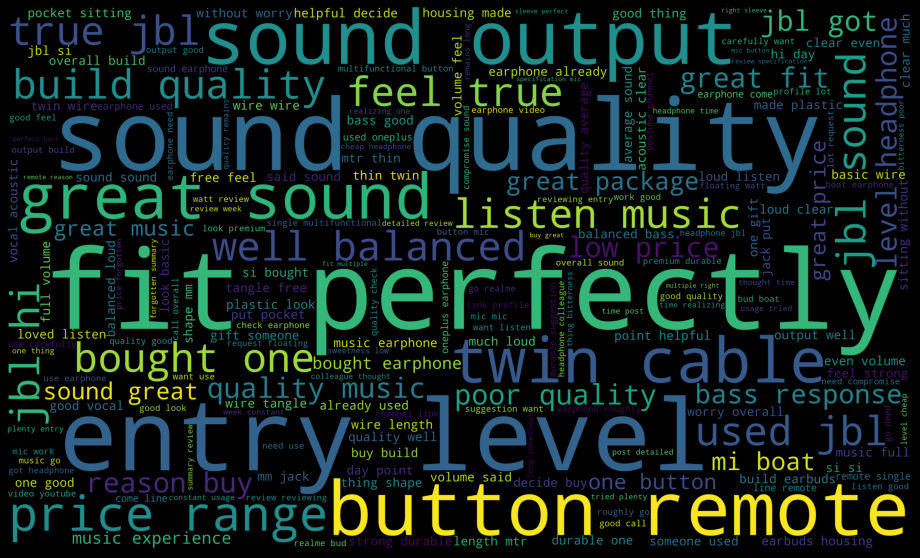

In [33]:
#word cloud representation of positive review 
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(positive_reviews.Text))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

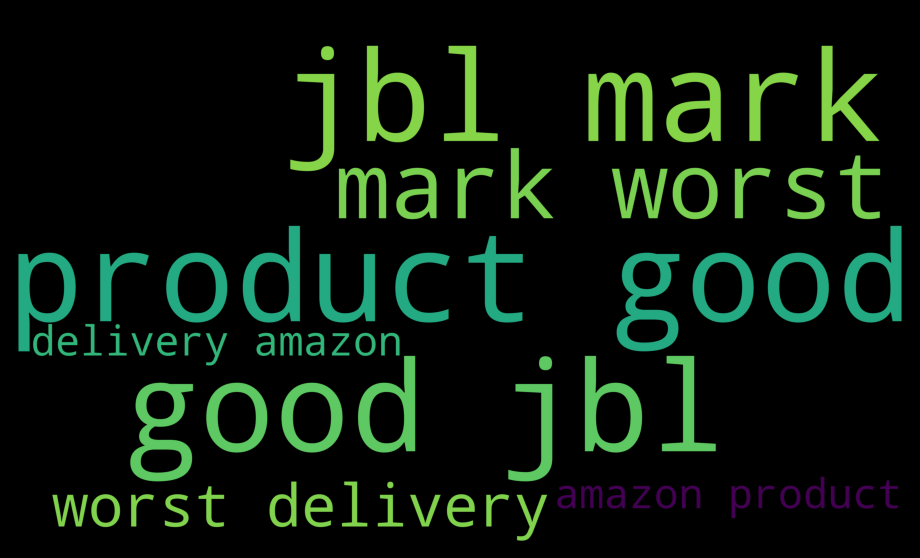

In [35]:
#word cloud representation of negative review 
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(Negative_reviews.Text))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Analysis', ylabel='count'>

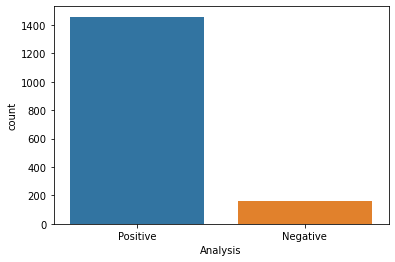

In [24]:
#using seaborn visualize the Analysis
import seaborn as sns
sns.countplot(x='Analysis',data=review_df)

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


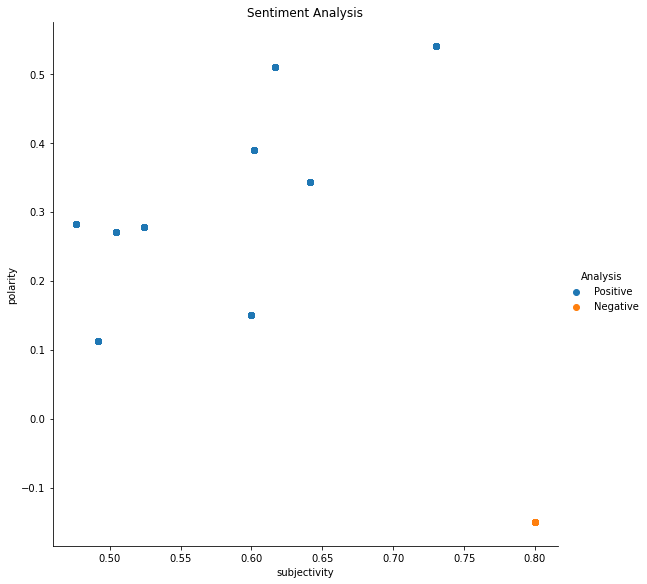

In [25]:
g = sns.FacetGrid(review_df,hue="Analysis", size=8)
g.map(plt.scatter, "subjectivity", "polarity")
plt.title("Sentiment Analysis")
g.add_legend()
plt.show()

In [26]:
#get the percentage of positive tweets
ptweets=review_df[review_df.Analysis=="Positive"]
ptweets =ptweets["Text"]     
round((ptweets.shape[0]/review_df.shape[0])*100,1)

90.0

In [27]:
ptweets=review_df[review_df.Analysis=="Negative"]
ptweets =ptweets["Text"]     
round((ptweets.shape[0]/review_df.shape[0])*100,1)

10.0

In [28]:
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [29]:
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [30]:
TextBlob("very great").sentiment

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

# Topic modelling

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

Here, we will be covering the steps on how to do Latent Dirichlet Allocation (LDA), which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

# Topic modeling all text

In [94]:
 #to do topic modelling all text we have to create document term matrix usinng 
    #CountVectorizer, and exclude common English stop words 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(review_df.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = review_df.index
data_dtm

,absolute,abused,according,acoustic,aesthetic,amazing,amazon,angled,aspect,associated,...,welcome,wire,wired,wonderful,work,working,worry,worst,worth,youtube
0,0,0,0,1,0,0,0,0,0,0,...,0,3,0,0,1,0,1,0,0,1
1,0,1,0,0,1,2,2,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,1,0,1,0,0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
#Topinc modelling all text
import gensim 
from gensim import corpora
from gensim import matutils, models
import scipy.sparse


In [98]:
#convert term document term matrix into term document matrix 
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619
absolute,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
abused,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
according,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
acoustic,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
aesthetic,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [99]:
#convert the term-document matrix into a new gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary,Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = corpora.Dictionary(data_dtm)



In [101]:
#now we created corpus,dictionary
#next we have to specify number of topics and number of passes and create the LDA model
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.041*"water" + 0.037*"screw" + 0.030*"compare" + 0.026*"evident" + 0.026*"aspect" + 0.022*"old" + 0.019*"right" + 0.015*"go" + 0.015*"compromise" + 0.015*"chinese"'),
 (1,
  '0.034*"connection" + 0.023*"amazon" + 0.023*"evident" + 0.023*"crisp" + 0.021*"certainly" + 0.018*"right" + 0.016*"water" + 0.016*"want" + 0.016*"reviewer" + 0.016*"compare"')]

In [103]:
#LDA model foe num_topics=3
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.044*"water" + 0.038*"aspect" + 0.033*"compare" + 0.033*"screw" + 0.028*"evident" + 0.022*"old" + 0.017*"chinese" + 0.017*"right" + 0.016*"listening" + 0.016*"positively"'),
 (1,
  '0.032*"evident" + 0.030*"connection" + 0.027*"crisp" + 0.024*"water" + 0.022*"compare" + 0.019*"right" + 0.016*"compromise" + 0.016*"screw" + 0.016*"ty" + 0.014*"want"'),
 (2,
  '0.038*"certainly" + 0.038*"amazon" + 0.038*"reviewer" + 0.032*"connection" + 0.025*"small" + 0.019*"right" + 0.019*"aspect" + 0.019*"provide" + 0.019*"old" + 0.019*"significant"')]

In [104]:
#LDA model foe num_topics=4
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.049*"amazon" + 0.049*"certainly" + 0.041*"connection" + 0.033*"reviewer" + 0.025*"aspect" + 0.024*"small" + 0.024*"jbl" + 0.024*"provide" + 0.024*"made" + 0.016*"old"'),
 (1,
  '0.052*"compare" + 0.051*"water" + 0.044*"aspect" + 0.037*"screw" + 0.037*"evident" + 0.022*"old" + 0.022*"chinese" + 0.022*"canal" + 0.022*"positively" + 0.022*"listening"'),
 (2,
  '0.030*"connection" + 0.030*"evident" + 0.028*"crisp" + 0.025*"water" + 0.019*"compare" + 0.017*"right" + 0.017*"compromise" + 0.017*"ty" + 0.017*"screw" + 0.014*"want"'),
 (3,
  '0.045*"right" + 0.033*"loud" + 0.022*"reviewer" + 0.022*"screw" + 0.022*"old" + 0.022*"brand" + 0.022*"also" + 0.022*"according" + 0.022*"durability" + 0.022*"past"')]

# Topic modeling Noun only

In [105]:
# create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [106]:
# Apply the nouns function to the Text  to filter only on nouns
review_df["noun"]=review_df["Text"].apply(nouns)

In [107]:
review_df

,Text,subjectivity,polarity,Analysis,noun
0,loved listen music earphone already used jbl c...,0.504221,0.270058,Positive,music earphone jbl c si c gift someone jbl c d...
1,lot request floating watt review reviewing ent...,0.524329,0.277887,Positive,lot request review entry level headphone jbl c...
2,bass response earphone amazing sound distincti...,0.601754,0.389474,Positive,bass response earphone sound song smoke water ...
3,product good jbl mark worst delivery amazon,0.800000,-0.150000,Negative,product jbl mark delivery amazon
4,bought one reading good review misleading jbl ...,0.491667,0.112500,Positive,reading review jbl sound bass n bass enjoy mus...
...,...,...,...,...,...
1615,recently bought earphone enjoy listening music...,0.616369,0.509226,Positive,earphone enjoy music time size design stay tim...
1616,great music excellent treble good base best pr...,0.730000,0.540000,Positive,music excellent base price bracket
1617,three thing impressed quality music clarity du...,0.641538,0.343077,Positive,thing quality music clarity durability product...
1618,bought earphone couple week back sale without ...,0.475952,0.281667,Positive,week sale research product package product but...


In [108]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(review_df.noun)
dtm_nouns = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
dtm_nouns.index = review_df.index
dtm_nouns

,absolute,amazing,amazon,attention,average,base,bass,beauty,becoz,beneath,...,voice,volume,water,way,week,wire,work,worry,worth,youtube
0,0,0,0,0,1,0,1,0,0,0,...,0,2,0,0,0,3,1,1,0,1
1,0,0,2,0,0,0,4,1,0,1,...,1,0,0,1,1,1,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [109]:
#convert term document term matrix into term document matrix 
tdm2 = dtm_nouns.transpose()
tdm2.head()

,0,1,2,3,4,5,6,7,8,9,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619
absolute,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
amazing,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
amazon,0,2,0,1,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
attention,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
average,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [118]:
#convert the term-document matrix into a new gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm2)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [119]:
# Gensim also requires dictionary,Creating the term dictionary of our corpus, where every unique term is assigned an index.  
#dictionary = corpora.Dictionary(dtm_nouns)
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())


In [120]:
#create LDA nouns with num_topics=2
lda_nouns = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2wordn, passes=10)
lda_nouns.print_topics()

[(0,
  '0.044*"headphone" + 0.039*"jbl" + 0.034*"product" + 0.029*"cable" + 0.029*"design" + 0.029*"price" + 0.024*"rating" + 0.020*"bass" + 0.019*"sound" + 0.019*"size"'),
 (1,
  '0.059*"quality" + 0.045*"sound" + 0.045*"jbl" + 0.039*"music" + 0.039*"product" + 0.039*"earphone" + 0.026*"bass" + 0.026*"wire" + 0.021*"output" + 0.020*"price"')]

In [121]:
#create LDA nouns with num_topics=3
lda_nouns = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2wordn, passes=10)
lda_nouns.print_topics()

[(0,
  '0.082*"quality" + 0.082*"jbl" + 0.055*"product" + 0.055*"bass" + 0.055*"music" + 0.054*"review" + 0.028*"experience" + 0.028*"price" + 0.027*"sound" + 0.027*"boat"'),
 (1,
  '0.051*"headphone" + 0.046*"jbl" + 0.033*"cable" + 0.032*"product" + 0.028*"design" + 0.028*"rating" + 0.025*"price" + 0.023*"sound" + 0.023*"bass" + 0.023*"level"'),
 (2,
  '0.047*"earphone" + 0.044*"quality" + 0.041*"sound" + 0.037*"music" + 0.036*"product" + 0.027*"fit" + 0.027*"jbl" + 0.025*"range" + 0.025*"size" + 0.025*"output"')]

# Topic modeling Noun and Adjectives

In [125]:
# create a function to pull out nouns and adjectives from a string of text
from nltk import word_tokenize, pos_tag

def noun_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2]=='JJ'
    tokenized = word_tokenize(text)
    all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(all_nouns_adj)

In [126]:
# Apply the nouns function to the Text  to filter only on nouns
review_df["noun_adj"]=review_df["Text"].apply(noun_adj)

In [127]:
review_df

,Text,subjectivity,polarity,Analysis,noun,noun_adj
0,loved listen music earphone already used jbl c...,0.504221,0.270058,Positive,music earphone jbl c si c gift someone jbl c d...,listen music earphone jbl c si c gift someone ...
1,lot request floating watt review reviewing ent...,0.524329,0.277887,Positive,lot request review entry level headphone jbl c...,lot request watt review entry level headphone ...
2,bass response earphone amazing sound distincti...,0.601754,0.389474,Positive,bass response earphone sound song smoke water ...,bass response earphone sound clear song smoke ...
3,product good jbl mark worst delivery amazon,0.800000,-0.150000,Negative,product jbl mark delivery amazon,product good jbl mark worst delivery amazon
4,bought one reading good review misleading jbl ...,0.491667,0.112500,Positive,reading review jbl sound bass n bass enjoy mus...,reading good review jbl good sound n bass comp...
...,...,...,...,...,...,...
1615,recently bought earphone enjoy listening music...,0.616369,0.509226,Positive,earphone enjoy music time size design stay tim...,earphone enjoy music time great fit ideal ear ...
1616,great music excellent treble good base best pr...,0.730000,0.540000,Positive,music excellent base price bracket,great music excellent treble good base best pr...
1617,three thing impressed quality music clarity du...,0.641538,0.343077,Positive,thing quality music clarity durability product...,thing impressed quality music clarity durabili...
1618,bought earphone couple week back sale without ...,0.475952,0.281667,Positive,week sale research product package product but...,couple week sale much research jbl product imp...


In [128]:
# Create a new document-term matrix using only nouns and adjectives
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(review_df.noun_adj)
dtm_nouns_adj = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
dtm_nouns_adj.index = review_df.index
dtm_nouns_adj

,absolute,acoustic,aesthetic,amazing,amazon,aspect,attention,audio,available,average,...,way,week,welcome,wire,wonderful,work,worry,worst,worth,youtube
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,3,0,1,1,0,0,1
1,0,0,1,1,2,1,0,1,2,0,...,1,1,1,1,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [129]:
#convert term document term matrix into term document matrix 
tdm3 = dtm_nouns_adj.transpose()
tdm3.head()

,0,1,2,3,4,5,6,7,8,9,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619
absolute,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
acoustic,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
aesthetic,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
amazing,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
amazon,0,2,0,1,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0


In [132]:
#convert the term-document matrix into a new gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm3)
corpus2 = matutils.Sparse2Corpus(sparse_counts)

In [133]:
# Gensim also requires dictionary,Creating the term dictionary of our corpus, where every unique term is assigned an index.  
#dictionary = corpora.Dictionary(dtm_nouns)
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [136]:
#create LDA nouns and adjectives with num_topics=2
lda_nouns_adj = models.LdaModel(corpus=corpus2, num_topics=2, id2word=id2wordna, passes=10)
lda_nouns_adj.print_topics()

[(0,
  '0.035*"sound" + 0.031*"earphone" + 0.027*"quality" + 0.027*"good" + 0.027*"music" + 0.023*"ear" + 0.023*"fit" + 0.023*"product" + 0.023*"price" + 0.023*"great"'),
 (1,
  '0.043*"jbl" + 0.040*"great" + 0.036*"headphone" + 0.032*"sound" + 0.029*"good" + 0.025*"product" + 0.022*"bass" + 0.022*"quality" + 0.018*"design" + 0.018*"rating"')]

In [137]:
#create LDA nouns and adjectives with num_topics=3
lda_nouns_adj = models.LdaModel(corpus=corpus2, num_topics=2, id2word=id2wordna, passes=10)
lda_nouns_adj.print_topics()

[(0,
  '0.035*"great" + 0.033*"sound" + 0.033*"jbl" + 0.030*"good" + 0.023*"headphone" + 0.019*"fit" + 0.019*"quality" + 0.019*"earphone" + 0.018*"product" + 0.016*"ear"'),
 (1,
  '0.048*"product" + 0.047*"quality" + 0.038*"sound" + 0.029*"music" + 0.029*"jbl" + 0.029*"bass" + 0.028*"experience" + 0.028*"cable" + 0.020*"good" + 0.019*"range"')]

# Find the topics of each documents

In [146]:
final_LDA=models.LdaModel(corpus=corpus2, num_topics=4, id2word=id2wordna, passes=50)
final_LDA.print_topics()

[(0,
  '0.055*"price" + 0.041*"great" + 0.041*"product" + 0.027*"canal" + 0.027*"cable" + 0.027*"range" + 0.027*"ear" + 0.027*"fit" + 0.014*"sturdy" + 0.014*"experience"'),
 (1,
  '0.041*"jbl" + 0.041*"great" + 0.038*"headphone" + 0.030*"good" + 0.030*"sound" + 0.023*"bass" + 0.023*"product" + 0.019*"design" + 0.019*"review" + 0.019*"rating"'),
 (2,
  '0.052*"product" + 0.052*"ear" + 0.052*"fit" + 0.039*"size" + 0.026*"music" + 0.026*"great" + 0.026*"range" + 0.026*"phone" + 0.026*"mobile" + 0.026*"connector"'),
 (3,
  '0.068*"sound" + 0.068*"quality" + 0.051*"good" + 0.051*"earphone" + 0.034*"jbl" + 0.034*"wire" + 0.025*"music" + 0.025*"output" + 0.017*"clear" + 0.017*"look"')]